## Training Models

Looking at 2 ways of training linear regression model
- Using direct closed form equation, that directly computes the model parameters that best fit the model to the training set
- using iterative optimaztion approach called GD that gradually tweaks the mode lparameters to minimize the cost function over the trainng set
    - batch GD
    - mini batch GD 
    - Stochastic GD
    
##### The normal equation  
To find the value of θ that minimizes the cost function, there is a closed-form
solution—in other words, a mathematical equation that gives the result
directly. This is called the _Normal Equation_

 \begin{equation*} θ^ˆ = (X ^{⊺}X)^{-1}X ^{⊺}y  \end{equation*} 

- θˆ is the value of θ that minimizes the cost function
- y is the vector of target values 

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(0.0, 2.0, 0.0, 15.0)

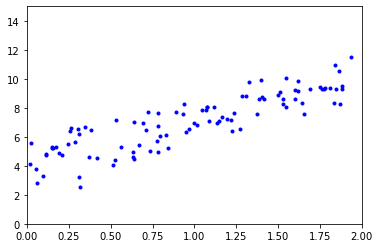

In [9]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

Computing θ^ˆ. Using inv from numpy linear algebra module  

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) 

[[4.17886523]
 [2.94529149]]


In [4]:
## Predicting 
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.17886523],
       [10.0694482 ]])

(0.0, 2.0, 0.0, 15.0)

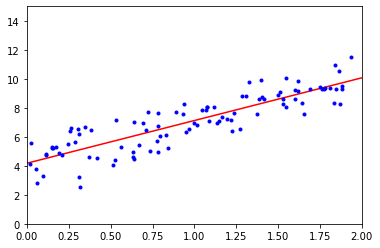

In [6]:
## Ploting the model predictions
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [10]:
## Method 2 using scikit lern
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_)
print(lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.17886523]
[[2.94529149]]
[[ 4.17886523]
 [10.0694482 ]]


The LinearRegression class is based on the scipy.linalg.lstsq()
function (the name stands for “least squares”), which we can call directly

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd)

[[4.17886523]
 [2.94529149]]


This function computes ˆθ = X+y, where X+ is the pseudoinverse of X
(specifically, the Moore-Penrose inverse). can use np.linalg.pinv()
to compute the pseudoinverse directly:

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.17886523],
       [2.94529149]])

The pseudoinverse itself is computed using a standard matrix factorization
technique called Singular Value Decomposition (SVD) that can decompose
the training set matrix X into the matrix multiplication of three matrices U Σ
V (see numpy.linalg.svd())

##### Computational Complexity
The Normal Equation computes the inverse of X X, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n^2.4) to O(n^3), depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly 2^(2.4) = 5.3 to 2^3 = 8.

The SVD approach used by Scikit-Learn’s LinearRegression class is about
O(n^2). If you double the number of features, you multiply the computation
time by roughly 4.

### Gradient Descent 

- general idea: tweak parameters iteratively to minimize a cost function
- learning rate: hyperparameter deciding the size of the steps     
- Starts by filling theta with random values (random initialization)
- parameter space: combination of model parameter that minimize the cost function
- Issues
    - can get stuck at local minima (if you stop early, will never reach global minima)
    - will reach global minima with low learning rate and long time
  
#### Batch Gradient Descent
